## Step 1
After importing the data set from the Western Pennsylvania Data Collection Center, the data has been cleaned by removing all entries with missing key infromation. This is done using the notna() function.

In [1]:
import pandas as pd

#import dataset
pittFireData = pd.read_csv("Pittsburgh_Fire_Data.csv", sep=",")

# get rid of unknown area data
pittFireData = pittFireData[pittFireData['neighborhood'].notna()]
pittFireData.head()

,call_no,incident_type,type_description,address,alarm_time,alarms,primary_unit,census_tract,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
3,F170043431,131.0,Passenger vehicle fire,"1700 BLOCK BELLEAU DR, PITTSBURGH PA 15212",2017-05-31T08:39:47,0,231EN38,2509.0,Fineview,6.0,25.0,4.200325e+10,1.0,25.0,1.0,1-10,40.460303,-80.006980
4,F180021111,111.0,Building fire,"2400 BLOCK VILLAGE RD, PITTSBURGH PA 15205",2018-03-09T10:26:42,1,231EN31,2808.0,Fairywood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-16,40.449009,-80.076607
5,F180021782,150.0,"Outside rubbish fire, Other","S 7TH ST & E CARSON ST, PITTSBURGH PA 15203",2018-03-12T09:13:28,0,231EN24,1702.0,South Side Flats,3.0,17.0,4.200317e+10,4.0,17.0,3.0,4-2,40.428618,-79.992239
6,F180022495,113.0,"Cooking fire, confined to container","200 BLOCK E OHIO ST, PITTSBURGH PA 15212",2018-03-14T19:46:10,1,231EN32,2204.0,Allegheny Center,1.0,22.0,4.200356e+10,1.0,22.0,1.0,1-6,40.453022,-80.003660
7,F180022546,111.0,Building fire,"7000 BLOCK LEMINGTON AVE, PITTSBURGH PA 15206",2018-03-14T23:49:22,1,231EN15,1203.0,Lincoln-Lemington-Belmar,9.0,12.0,4.200312e+10,2.0,12.0,5.0,3-18,40.471358,-79.898240


## Step 2
Now that the data has been cleaned we can summerize the data. There are many ways to do this but I have chosen to sort the data based on the number of fires within a given neighborhood. This can be done by using query masks and counting the number of rows in the selection.

In [2]:
import geopandas
from shapely.geometry import Point # Shapely for converting latitude/longtitude to geometry
rows = []
for area in pittFireData['neighborhood'].unique():
    query_mask = pittFireData['neighborhood'] == area
    selection = pittFireData[query_mask]
    rows.append([area, selection.shape[0]])

    
fireDataSummary = pd.DataFrame(rows, columns=["neighborhood","number_of_incidents"])
fireDataSummary

,neighborhood,number_of_incidents
0,Fineview,45
1,Fairywood,23
2,South Side Flats,220
3,Allegheny Center,53
4,Lincoln-Lemington-Belmar,173
...,...,...
86,Arlington Heights,12
87,South Shore,21
88,Oakwood,13
89,Chartiers City,14


## Step 3
Using GeoPandas and Neighborhood data given in lab 9, We are able to summarize the data on a visual map. We can take the geometric data and neighborhood names from the neighborhood data and combine it with the fire summary data based on the neighborhood name. We can then create a heat map based on the number of fires in a specific area.

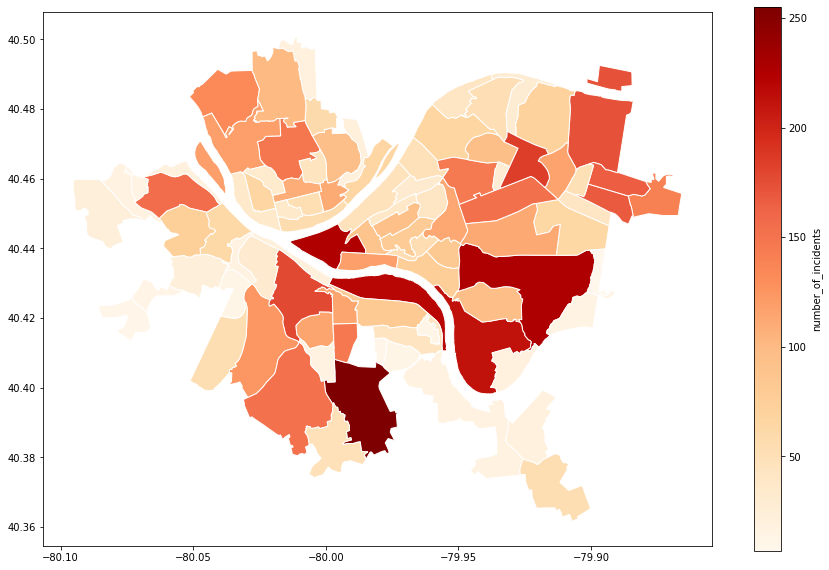

In [3]:
import pandas as pd
import geopandas
%matplotlib inline

neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
fire_map = neighborhoods.merge(fireDataSummary, how='left', left_on='hood', right_on='neighborhood') # merge with fire data
# geoFireDataSummary = geopandas.GeoDataFrame(fireDataSummary, geometry=geometry)
# geoFireDataSummary = geopandas.GeoDataFrame(fireDataSummary, geometry=geopandas.points_from_xy(fireDataSummary.longitude, fireDataSummary.latitude))
fire_map
# fire_map = geoFireDataSummary.sjoin(neighborhoods, how="inner", predicate='intersects')
fire_map.plot(column='number_of_incidents', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "number_of_incidents"}, # label the legend
               figsize=(15, 10),         # set the size
               )

## Step 4
We can now narrow our selection by selecting all areas that have incidents less than 20. This will help us to see which areas we should avoid when selecting the best neighborhood and help to make conculsions about which areas are better than others.

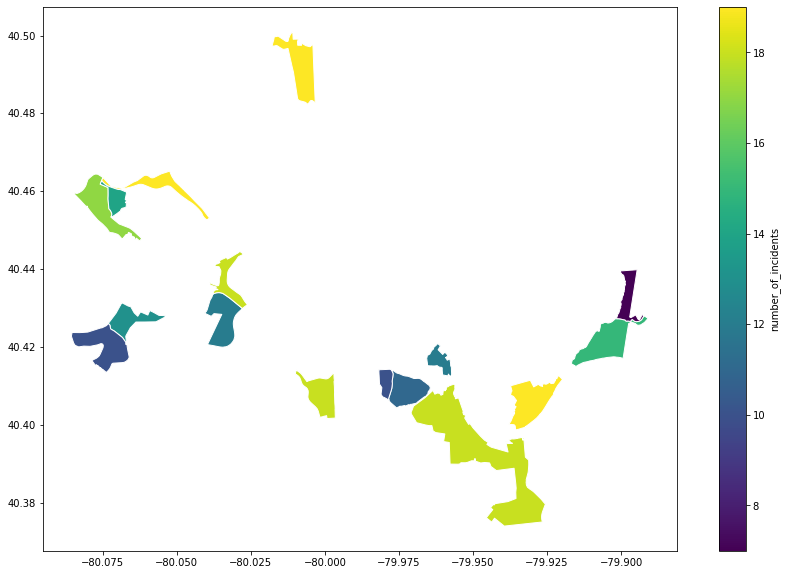

In [4]:
import pandas as pd
import geopandas
%matplotlib inline

neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
fireDataSummary.loc[(fireDataSummary['number_of_incidents'] < 20)]

fire_map = neighborhoods.merge(fireDataSummary.loc[(fireDataSummary['number_of_incidents'] < 20)], how='left', left_on='hood', right_on='neighborhood') # merge with fire data
fire_map
fire_map = fire_map[fire_map['neighborhood'].notna()]
fire_map.plot(column='number_of_incidents', # set the data to be used for coloring
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "number_of_incidents"}, # label the legend
               figsize=(15, 10), # set the size
               )


# Step 5 
We can now simply sort the data to find the area with the lowest fire risk.

In [5]:
fireDataSorted = fireDataSummary.sort_values(by='number_of_incidents')
fireDataSorted

,neighborhood,number_of_incidents
83,Mount Oliver Borough,6
61,Regent Square,7
90,Mt. Oliver,10
85,East Carnegie,10
84,St. Clair,11
...,...,...
37,Hazelwood,213
2,South Side Flats,220
25,Central Business District,225
11,Squirrel Hill South,226


## Conclusion
By looking at the fire map we can see that most of the highest cases are located in the center of the city. These are areas that you should avoid. This is further supported by the reduced fire data map showing that the areas with the lowest cases are far from the City. Overall it seems that Mount Oliver Borough has the lowest cases but any of the top 5 areas all have less than 11 fires. Any of these locations would be good to live in: Mount Oliver Borough, Regent Square, Mt. Oliver, East Carnegie, St. Clair

## Step 1 ##

First, the relevant datasat obtained from the WPRDC is displayed.

In [6]:
import pandas as pd
%matplotlib inline
import geopandas 

pitt_playground_data = pd.read_csv("pitt_playground_data.csv")

pitt_playground_data.head()

,id,name,equipment_type,manufacturer,safety_surface_type,ada_accessible,street_number,street,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1780722587,Able Long Playground,Play Area 2 to 5,Little Tykes,Pour in Place,f,211.0,Coast Ave,Beechview,4,19,42003192000,5,19,6,4-28,40.408381,-80.028520
1,702514290,North Ave. Playground,Play Area 2 to 5,Playworld,SofSurfaces,f,377.0,W North Ave,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.454526,-80.010188
2,1267038491,Vietnam Veteran's Playground,Slide,Little Tykes,SofSurfaces,f,108.0,Panther Hollow Rd,Squirrel Hill South,5,14,42003980500,3,14,4,2-8,40.434185,-79.944323
3,14898932,Schenley Overlook Playground,Swing 2 Bays,Little Tykes,SofSurfaces,t,NaN,Overlook Dr,Squirrel Hill South,5,14,42003980500,3,14,4,2-8,40.432130,-79.947774
4,204832406,Schenley Overlook Playground,Slide,Little Tykes,SofSurfaces,f,NaN,Overlook Dr,Squirrel Hill South,5,14,42003980500,3,14,4,2-8,40.432215,-79.947817


#### I then manipulate the dataset to display the count of total playground equipment within each neighborhood ####

In [7]:
pitt_playground_data['neighborhood'].value_counts()


Squirrel Hill South    32
East Liberty           26
Beechview              21
Allegheny Center       15
South Side Slopes      14
                       ..
Central Oakland         2
Lower Lawrenceville     2
East Carnegie           2
West Oakland            1
Strip District          1
Name: neighborhood, Length: 68, dtype: int64

## Step 2 ##

Given that we are only concerned with ADA accessibile playground equipment, I then use query masks to further manipulate the data into a dataframe that displays total number of ADA accessibile play areas by neighborhood.

In [9]:
query_mask = pitt_playground_data["ada_accessible"] == "t"

ada_playground = pitt_playground_data[query_mask]

new = ada_playground['neighborhood'].value_counts()

ada_sort = new.reset_index()
ada_sort = ada_sort.rename(columns={'neighborhood' : 'ada_accessible_play_areas'})
ada_sort = ada_sort.rename(columns={'index': 'neighborhood'})

ada_sort




,neighborhood,ada_accessible_play_areas
0,Squirrel Hill South,7
1,South Side Slopes,4
2,East Liberty,4
3,Elliott,4
4,Beechview,4
5,Highland Park,3
6,Mount Washington,3
7,Sheraden,3
8,South Side Flats,2
9,Greenfield,2


## Step 3 ##

Finally, using geopandas I import the Pittsburgh Neighborhood dataset and merge it with the ADA neighborhood summary data.  I then plot a choropleth map using different shadings to reflect the number of ADA accessibile playground equipment areas within each neighborhood.

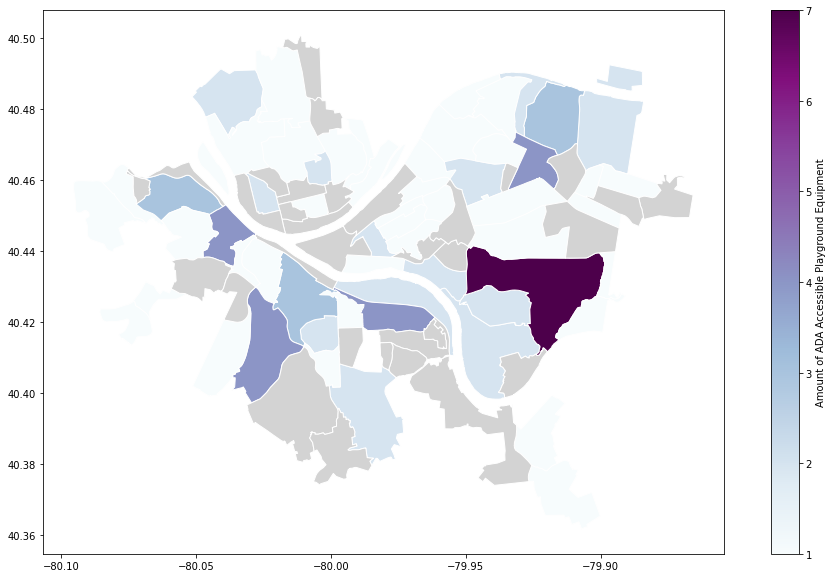

In [10]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
ada_map = neighborhoods.merge(ada_sort, how='left', left_on='hood', right_on='neighborhood')


ada_map.plot(column='ada_accessible_play_areas', 
               cmap='BuPu', edgecolor="white",legend=True,              
               legend_kwds={'label': "Amount of ADA Accessible Playground Equipment"}, 
               figsize=(17, 10),         
               missing_kwds={"color": "lightgrey"})

## Conclusion ##

Based on the choropleth map, we can very clearly see that Squirrel Hill South is a significant outlier, having 7 ADA equipped play areas. Based on the metric of accessibility to ADA playground equipment, Squirrel Hill is the best neighborhood in Pittsburgh.

In [11]:
import pandas as pd
import geopandas as gpd #Importing essentials
import numpy as np
import matplotlib.pyplot as plt

# Final Project Code Notebook

For this project, I will determine which neighborhood is the best by determining which neighborhood is the safest.  I will do that using a dataset called 'Pittsburgh Police Arrest Data' (https://data.wprdc.org/datastore/dump/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f).  To do this, I will determine the neighborhood where the least amount of arrests happen.

## Step 1: Creating and manipulating dataset

In this step, I import the dataset and manipulate it in order to find the safest neighborhood in Pittsburgh.  I do this by creating a series using the pandas 'value_counts()' function.  This creates an ordered series for the total amount of instances each neighborhood has in the dataset.  I also create my final list by using the series to find which neighborhood has the lowest percentatge of total arrests that occur.

In [12]:
crimeRates = pd.read_csv("crimeRates.csv", index_col="PK") #Reading in csv file
sortedRates = crimeRates['INCIDENTNEIGHBORHOOD'].value_counts() #creating an ordered series based on total number of instances of a neighborhood
finalCrimeMetrics = [] #creating final list
crimeSum = sortedRates.sum() #finding sum for purpose of final metric

for i in range(0, sortedRates.size):  #creating finalCrimeMetrics, an ordered list of neighborhoods based on the % of total pittsburgh arrests 
    finalCrimeMetrics.append((sortedRates.index[i], "{:.2f}".format(100 * (sortedRates.iloc[i]/crimeSum))))
    



### Below are examples of outputs from the series sortedRates, and finalCrimeMetrics, respectively

#### sortedRates

In [13]:
sortedRates.head()

Central Business District    3161
South Side Flats             2669
Carrick                      1844
East Allegheny               1709
Homewood South               1680
Name: INCIDENTNEIGHBORHOOD, dtype: int64

#### finalCrimeMetrics

In [14]:
for i in range(0,5):
    print(finalCrimeMetrics[i])

('Central Business District', '6.36')
('South Side Flats', '5.37')
('Carrick', '3.71')
('East Allegheny', '3.44')
('Homewood South', '3.38')


# Step 2: Visualizing the Data

In this step, I use the above list and series to create a bar graph representing the amount of arrests in each of Pittsburgh's neighborhoods.  To do this, I use 'for loops' to fill lists that will be used to create the data for the x and y axes.  For the x axis I used each neighborhood's index number (since all of the names would cause the axis to become very messy), and for the y axis I used iloc to pull each neighborhood's total number of arrests.

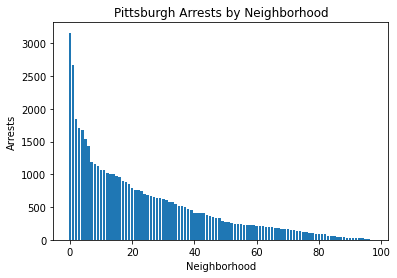

In [15]:
x,y = [],[] #creating needed lists for axes

for i in range(0, sortedRates.size): #filling x-axis list
    x.append(i)
    
for i in range(0, sortedRates.size): #filling y-axis list
    y.append(sortedRates.iloc[i])
    
plt.bar(x,y) #creating initial graph
plt.title('Pittsburgh Arrests by Neighborhood') #formating, creating, and printing bar graph
plt.xlabel('Neighborhood')
plt.ylabel('Arrests')
plt.show()

# Step 3: Analysis

Based on the above metrics, I have concluded that the best and safest neighborhood in pittsburgh to live in is Herr's Island (I am combining the statistics of Mt. Oliver Boro and Mt. Oliver Neighborhood to make this decision). Herr's island has the least amount of arrests, coming in at just 6.  Mount oliver neighborhood and Boro have a combined 19. 

In [16]:
sortedRates

Central Business District    3161
South Side Flats             2669
Carrick                      1844
East Allegheny               1709
Homewood South               1680
                             ... 
Regent Square                  27
Central Northside              23
Mt. Oliver Boro                17
Troy Hill-Herrs Island          6
Mt. Oliver Neighborhood         2
Name: INCIDENTNEIGHBORHOOD, Length: 98, dtype: int64

![title](https://riverlifepgh.org/wp-content/uploads/2016/10/Washingtons-Landing-Riverfront-residential.jpg)